## Exploration

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

metadata = pd.read_csv('~/Desktop/data/metadata.csv')
metadata.columns = ['book_id', 'title', 'publication_year', 'link']


In [10]:
metadata.head()

,book_id,title,publication_year,link
0,10006,La Fiammetta by Giovanni Boccaccio,1907,http://www.gutenberg.org/ebooks/10006
1,1001,Divine Comedy Inferno by Dante Alighieri,1882,http://www.gutenberg.org/ebooks/1001
2,10021,Tenterhooks by Ada Leverson,1912,http://www.gutenberg.org/ebooks/10021
3,10024,Beneath the Banner by F. J. Cross,1895,http://www.gutenberg.org/ebooks/10024
4,10028,Spalding's Official Baseball Guide 1913 Edited...,1913,http://www.gutenberg.org/ebooks/10028


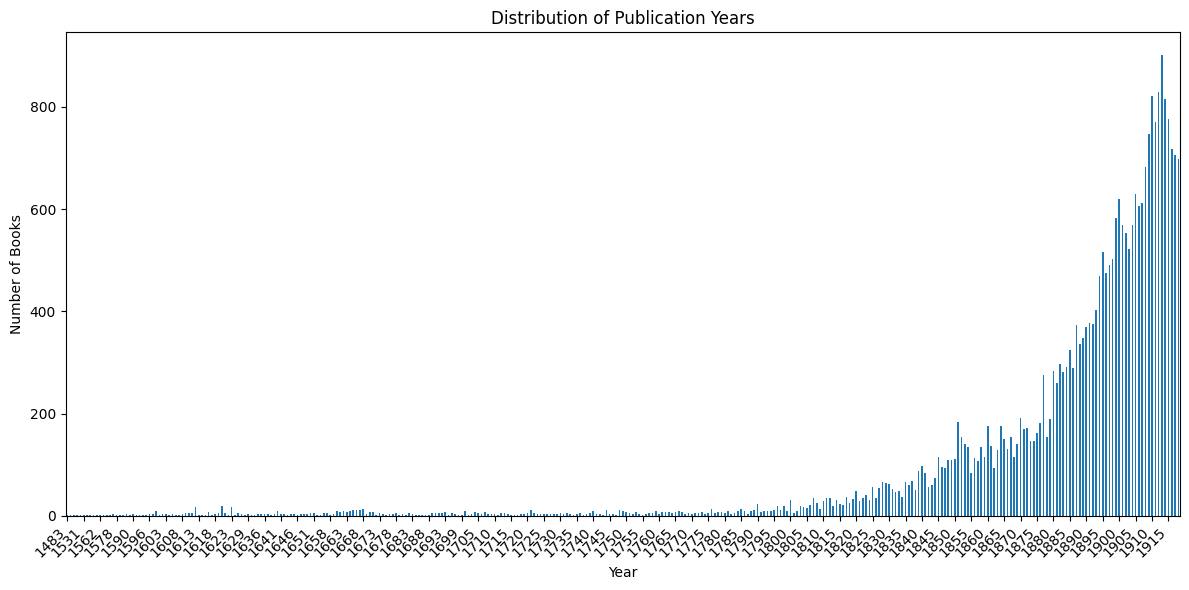

In [11]:
import matplotlib.pyplot as plt

# Plot distribution
plt.figure(figsize=(12, 6))
year_counts = metadata.iloc[:, 2].value_counts().sort_index()
year_counts.plot(kind='bar')

plt.title('Distribution of Publication Years')
plt.xlabel('Year')
plt.ylabel('Number of Books')

# Rotate x-axis labels and show only every nth label (e.g., every 5th year)
tick_freq = 5
plt.xticks(
    ticks=range(0, len(year_counts), tick_freq),
    labels=year_counts.index[::tick_freq],
    rotation=45,
    ha='right'
)

plt.tight_layout()
plt.show()



In [22]:
year_counts_df = metadata.iloc[:, 2].value_counts().sort_index().reset_index()
year_counts_df.columns = ['Year', 'Count']
pd.reset_option("all")
display(year_counts_df)


,Year,Count
0,1483,1
1,1485,1
2,1509,1
3,1520,1
4,1530,2
...,...,...
334,1914,815
335,1915,777
336,1916,717
337,1917,705


Data has massive skew left, need to try and get data into format with uniform distribution. Can try by getting sentence excerpts from texts.

In [13]:
# Create mapping of book_id to publication_year
id_to_year = dict(zip(metadata['book_id'], metadata['publication_year']))


In [14]:
import os

def process_text_files(text_dir, id_to_year):
    data = []
    text_dir = os.path.expanduser(text_dir)
    for file_name in os.listdir(text_dir):
        if file_name.endswith('.txt'):
            book_id = int(file_name.split('.')[0])  
            if book_id in id_to_year:
                with open(os.path.join(text_dir, file_name), 'r', encoding='utf-8') as f:
                    text_content = f.read()
                    label = id_to_year[book_id]
                    data.append({'text': text_content, 'label': label})
    return data

# Process files
test_data = process_text_files('~/Desktop/data/test', id_to_year)


In [19]:
import os
import random
import re
from collections import defaultdict

# Define your eras
ERA_RANGES = [(1483, 1525), (1525, 1575), (1575, 1625), (1625, 1675),
              (1675, 1725), (1725, 1775), (1775, 1825), (1825, 1875), (1875, 1919)]

def get_era(year):
    for i, (start, end) in enumerate(ERA_RANGES):
        if start <= year <= end:
            return f"{start}-{end}"
    return None

def split_into_sentences(text):
    # Basic sentence splitter using regex (you can replace with a tokenizer for better results)
    sentences = re.split(r'(?<=[.!?]) +', text)
    return [s.strip() for s in sentences if len(s.strip()) > 0]

def extract_random_excerpts(sentences, num_excerpts=5, min_len=3, max_len=5):
    excerpts = []
    if len(sentences) < min_len:
        return excerpts
    for _ in range(num_excerpts):
        start = random.randint(0, max(0, len(sentences) - min_len))
        end = start + random.randint(min_len, min(max_len, len(sentences) - start))
        excerpt = ' '.join(sentences[start:end])
        excerpts.append(excerpt)
    return excerpts

def process_text_files(text_dir, id_to_year, excerpts_per_file=5):
    era_buckets = defaultdict(list)
    text_dir = os.path.expanduser(text_dir)

    for file_name in os.listdir(text_dir):
        if file_name.endswith('.txt'):
            book_id = int(file_name.split('.')[0])
            if book_id in id_to_year:
                year = id_to_year[book_id]
                era = get_era(year)
                if era:
                    with open(os.path.join(text_dir, file_name), 'r', encoding='utf-8') as f:
                        text_content = f.read()
                        sentences = split_into_sentences(text_content)
                        excerpts = extract_random_excerpts(sentences, num_excerpts=excerpts_per_file)
                        for excerpt in excerpts:
                            era_buckets[era].append({'text': excerpt, 'label': era})
    return era_buckets

def sample_uniform_dataset(era_buckets, samples_per_era):
    dataset = []
    for era, excerpts in era_buckets.items():
        if len(excerpts) >= samples_per_era:
            dataset.extend(random.sample(excerpts, samples_per_era))
        else:
            print(f"Warning: Not enough excerpts in era {era}, only {len(excerpts)} available")
            dataset.extend(excerpts)  # include all available if below threshold
    random.shuffle(dataset)
    return dataset



In [ ]:
# Assume id_to_year is already defined
era_buckets = process_text_files('~/Desktop/data/test', id_to_year, excerpts_per_file=10)
uniform_dataset = sample_uniform_dataset(era_buckets, samples_per_era=200)  # Adjust as needed

In [21]:
uniform_dataset

[{'text': "[551]\n\nEven the Gods, forsooth, for ever permit the fair to be forsworn, and\nbeauty has its divine sway. [552] I remember that of late she swore both\nby her own eyes and by mine, and mine felt pain. [553] Tell me, ye\nGods, if with impunity she has proved false to you, why have I suffered,\npunishment for the deserts of another? But the virgin daughter of\nCepheus is no reproach, _forsooth_, to you, [554] who was commanded to\ndie for her mother, so inopportunely beauteous. 'Tis not enough that I\nhad you for witnesses to no purpose; unpunished, she laughs at even the\nGods together with myself; that by my punishment she may atone for her\nperjuries, am I, the deceived, to be the victim of the deceiver?",
  'label': '1875-1919'},
 {'text': 'Now, we’ll all go down to a restaurant\nand have breakfast. I’m hungry myself just now.”\n\n“What’s the matter with the hotel?” asked Ben.\n\nMellen did not care to explain to the boys exactly what had taken place\ndown stairs, but he